In [1]:
import sys,os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/home/nuria/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# path to data
path = os.getcwd() 

# read data
sys.path.insert(0, '.')

# Building a machine learning with scikit-learn
https://medium.com/towards-data-science/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [3]:
train = pd.read_csv('trainExtData.csv', sep='\t', header=None)
train.dropna()
print(train.shape)
train.head(2)

(8306, 201)


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,t,-0.064951,-0.116035,0.010827,-0.14042,-0.165595,-0.13803,0.488963,-0.005196,0.228817,...,-0.080192,0.277143,-0.116573,-0.488778,0.153894,0.088258,0.114373,0.390929,0.363037,0.512109
1,f,-0.064951,-0.116035,0.010827,-0.14042,-0.165595,-0.13803,0.488963,-0.005196,0.228817,...,0.431528,0.331433,0.327146,0.176503,-0.039943,-0.286237,-0.368482,0.235317,0.032250,-0.255585


In [4]:
# rename variables
train = train.rename(columns= { column: 'att'+str(column) for column in train })
train = train.rename(columns= {'att0': 'class'})
print(list(train.columns))

['class', 'att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17', 'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25', 'att26', 'att27', 'att28', 'att29', 'att30', 'att31', 'att32', 'att33', 'att34', 'att35', 'att36', 'att37', 'att38', 'att39', 'att40', 'att41', 'att42', 'att43', 'att44', 'att45', 'att46', 'att47', 'att48', 'att49', 'att50', 'att51', 'att52', 'att53', 'att54', 'att55', 'att56', 'att57', 'att58', 'att59', 'att60', 'att61', 'att62', 'att63', 'att64', 'att65', 'att66', 'att67', 'att68', 'att69', 'att70', 'att71', 'att72', 'att73', 'att74', 'att75', 'att76', 'att77', 'att78', 'att79', 'att80', 'att81', 'att82', 'att83', 'att84', 'att85', 'att86', 'att87', 'att88', 'att89', 'att90', 'att91', 'att92', 'att93', 'att94', 'att95', 'att96', 'att97', 'att98', 'att99', 'att100', 'att101', 'att102', 'att103', 'att104', 'att105', 'att106', 'att107', 'att108', 'att109', 'att110'

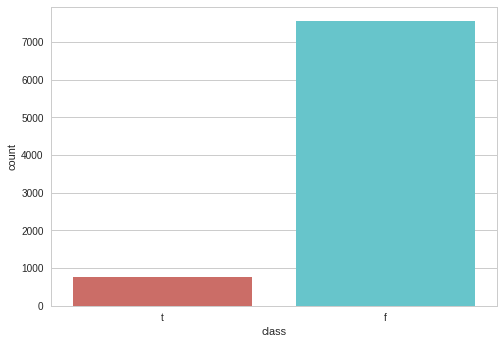

In [5]:
# barplot for the dependent variable
sns.countplot(x= 'class', data= train, palette= 'hls')
plt.show()

In [6]:
# check the missing values
train.isnull().sum()

class     0
att1      0
att2      0
att3      0
att4      0
att5      0
att6      0
att7      0
att8      0
att9      0
att10     0
att11     0
att12     0
att13     0
att14     0
att15     0
att16     0
att17     0
att18     0
att19     0
att20     0
att21     0
att22     0
att23     0
att24     0
att25     0
att26     0
att27     0
att28     0
att29     0
         ..
att171    0
att172    0
att173    0
att174    0
att175    0
att176    0
att177    0
att178    0
att179    0
att180    0
att181    0
att182    0
att183    0
att184    0
att185    0
att186    0
att187    0
att188    0
att189    0
att190    0
att191    0
att192    0
att193    0
att194    0
att195    0
att196    0
att197    0
att198    0
att199    0
att200    0
Length: 201, dtype: int64

### Data preprocessing

In [7]:
# create dummy variables, variables with only two values: {1,0}
# it makes no sense here because my independent variables are numeric

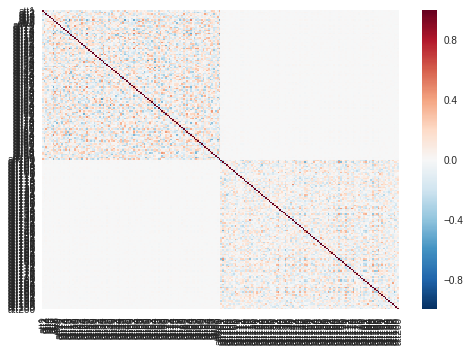

In [8]:
# check the independence between independent variables
sns.heatmap(train.corr())
plt.show()

In [9]:
# split the data into training and test sets
X = train.iloc[:,1:]
y = train.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 0)

In [10]:
# check out training data is sufficient
X_train.shape

(6229, 200)

### Logistic Regression Model

In [11]:
# fit logistic regression to the training set
classifier= LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# predicting the test set results and create confusion matrix
y_pred= classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1871    7]
 [  95  104]]


In [13]:
# accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [14]:
# compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          f       0.95      1.00      0.97      1878
          t       0.94      0.52      0.67       199

avg / total       0.95      0.95      0.94      2077



In [15]:
# predict on the unclassified set as test set
test = pd.read_csv('../../../rare-disease-graph/5-classifier-learn/unclassified.csv', sep='\t', header= None)
test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.064951,-0.116035,0.010827,-0.14042,-0.165595,-0.13803,0.488963,-0.005196,0.228817,-0.188893,...,0.277143,-0.116573,-0.488778,0.153894,0.088258,0.114373,0.390929,0.363037,0.512109,?
1,-0.064951,-0.116035,0.010827,-0.14042,-0.165595,-0.13803,0.488963,-0.005196,0.228817,-0.188893,...,0.331433,0.327146,0.176503,-0.039943,-0.286237,-0.368482,0.235317,0.032250,-0.255585,?


In [16]:
X_unclass= test.iloc[:,:-1]
y_pred= classifier.predict(X_unclass)
y_pred

array(['f', 'f', 'f', ..., 't', 'f', 'f'], dtype=object)

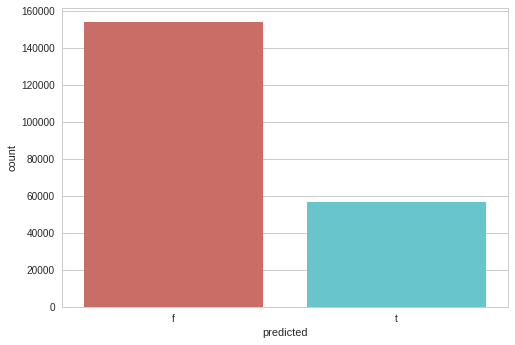

In [17]:
data= pd.DataFrame(y_pred)
data= data.rename(columns= {0: 'predicted'})
sns.countplot(x= 'predicted', data= data, palette= 'hls')
plt.show()

### Classifier visualizatin playground


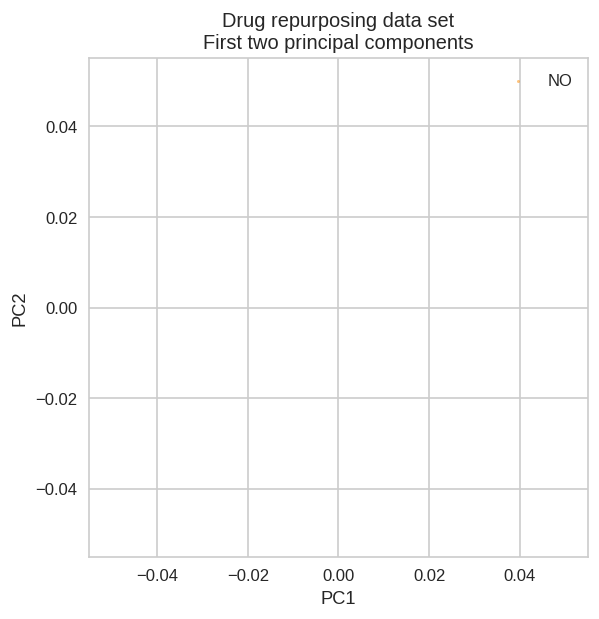

In [18]:
# PCA
from sklearn.decomposition import PCA

X= train.iloc[:,1:]
y= train.iloc[:,0]

pca= PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(pca, y, random_state= 0)

plt.figure(dpi= 120)
plt.scatter(pca[y.values== 0,0], pca[y.values== 1,1], alpha= .5, label= 'NO', s= 2, color= 'darkorange')
plt.legend()
plt.title('Drug repurposing data set\nFirst two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

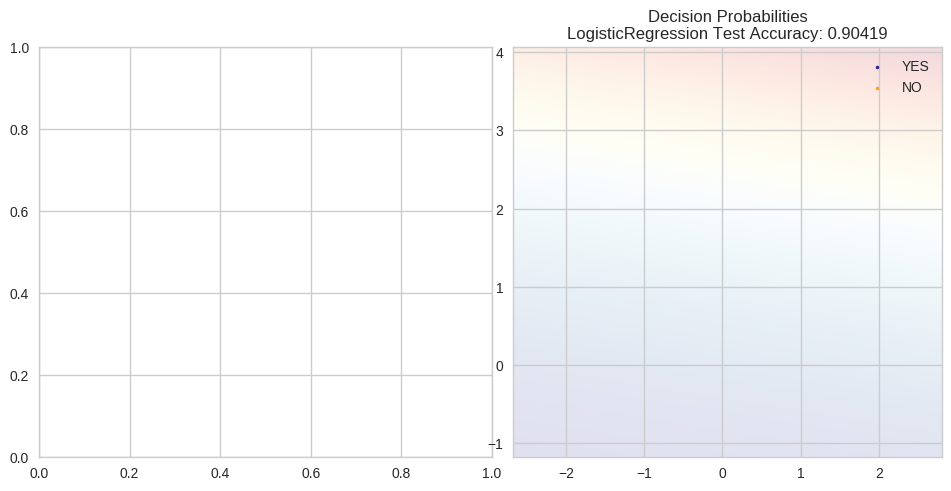

In [19]:
def plot_bank(X, y, fitted_model):
    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
    Z = Z.reshape(xx.shape)
    plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
    plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
    plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
    plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
    plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.legend()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()